In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("C:\\Users\\finnh_2qa64z9\\OneDrive - BBBaden\\BBB\\259\\pizza_sales.csv")


Spalten im DataFrame: ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']

Beschreibende Statistik (nur numerische Spalten):
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   24310.500000  10701.479761      1.019622     16.494132     16.821474
std    14035.529381   6180.119770      0.143077      3.621789      4.437398
min        1.000000      1.000000      1.000000      9.750000      9.750000
25%    12155.750000   5337.000000      1.000000     12.750000     12.750000
50%    24310.500000  10682.500000      1.000000     16.500000     16.500000
75%    36465.250000  16100.000000      1.000000     20.250000     20.500000
max    48620.000000  21350.000000      4.000000     35.950000     83.000000

Gefundene numerische Spalten: ['pizza_id', 'order_id', 'quantity

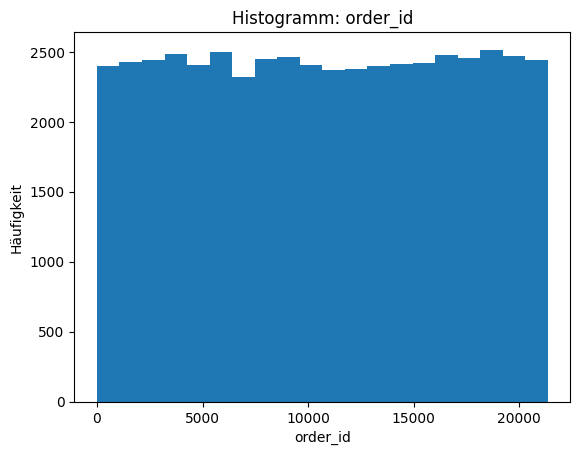

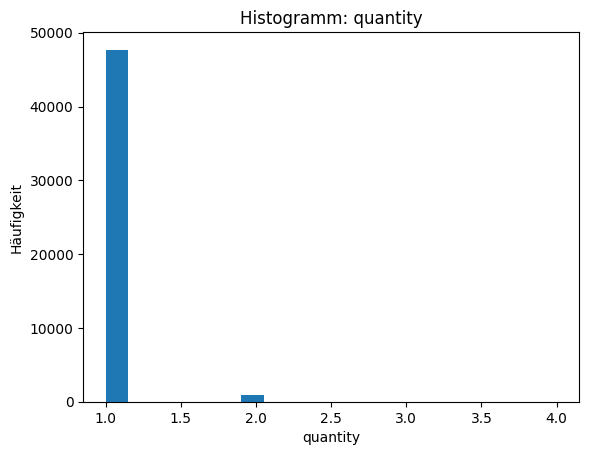

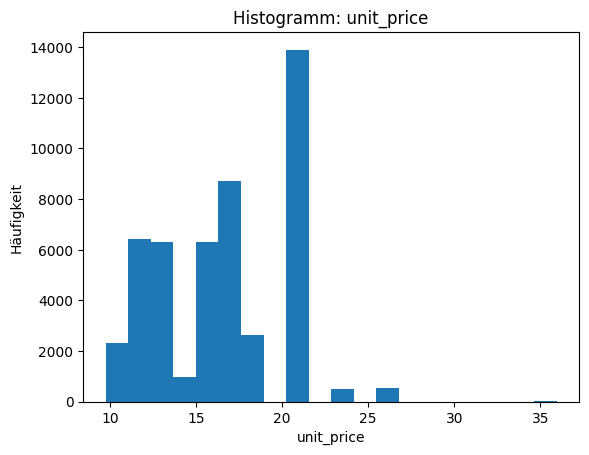

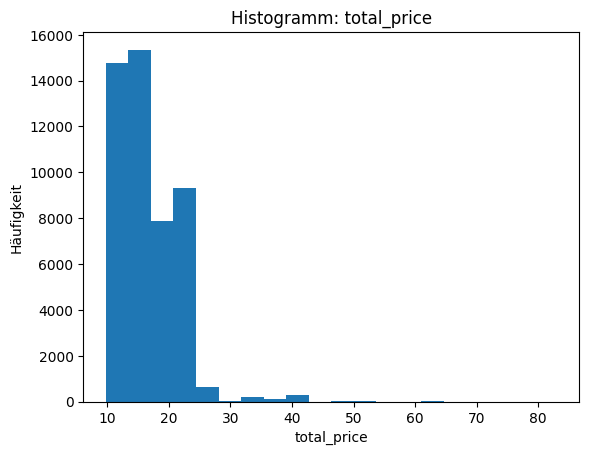

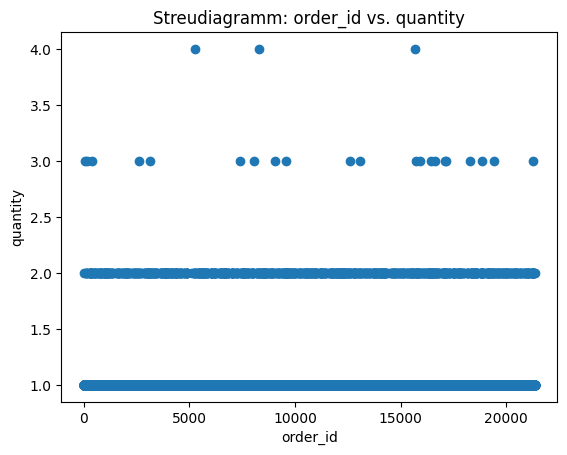


Keine passende Pizza-Spalte und/oder Werte-Spalte für ein Balkendiagramm gefunden.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("C:\\Users\\finnh_2qa64z9\\OneDrive - BBBaden\\BBB\\259\\pizza_sales.csv")

# -----------------------------
# 1) Allgemeiner Überblick
# -----------------------------
print("Spalten im DataFrame:", df.columns.tolist())
print("\nBeschreibende Statistik (nur numerische Spalten):")
print(df.describe())

# -----------------------------
# 2) Numerische Spalten ermitteln,
#    ID-Spalten rausfiltern
# -----------------------------
numeric_cols_all = df.select_dtypes(include=[np.number]).columns
print("\nGefundene numerische Spalten:", numeric_cols_all.tolist())

# Identifiziere potenzielle ID-Spalten (Anzahl eindeutiger Werte == Anzahl Zeilen)
id_like_cols = [col for col in numeric_cols_all if df[col].nunique() == len(df)]
print("Vermutete ID-Spalten:", id_like_cols)

# "Echte" numerische Spalten ohne ID-Spalten
numeric_cols = [col for col in numeric_cols_all if col not in id_like_cols]
print("Verwendete numerische Spalten:", numeric_cols)

if len(numeric_cols) == 0:
    print("\nKeine 'echten' numerischen Spalten gefunden (nur IDs). Keine Diagramme möglich.")
else:
    # -----------------------------
    # 3) Histogramme pro numerischer Spalte (ohne IDs)
    # -----------------------------
    for col in numeric_cols:
        plt.hist(df[col], bins=20)
        plt.title(f"Histogramm: {col}")
        plt.xlabel(col)
        plt.ylabel("Häufigkeit")
        plt.show()

    # -----------------------------
    # 4) Streudiagramm, falls mind. 2 numerische Spalten
    # -----------------------------
    if len(numeric_cols) >= 2:
        x_col, y_col = numeric_cols[:2]
        plt.scatter(df[x_col], df[y_col])
        plt.title(f"Streudiagramm: {x_col} vs. {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
    else:
        print("\nNur eine echte numerische Spalte vorhanden – Streudiagramm nicht möglich.")

# -----------------------------
# 5) Balkendiagramm: Pizza-Sorte vs. Umsatz/Menge
# -----------------------------
pizza_spalten = ["Pizza", "PizzaType"]  # Spaltenname anpassen, falls anders
moegliche_werte_spalten = ["Revenue", "SoldUnits", "Quantity", "Sales"]  # Ggf. anpassen

gefundenes_pizza_feld = None
for sp in pizza_spalten:
    if sp in df.columns:
        gefundenes_pizza_feld = sp
        break

gefundenes_wert_feld = None
for mv in moegliche_werte_spalten:
    if mv in df.columns:
        gefundenes_wert_feld = mv
        break

if gefundenes_pizza_feld and gefundenes_wert_feld:
    gruppiert = df.groupby(gefundenes_pizza_feld)[gefundenes_wert_feld].sum().reset_index()
    
    plt.bar(gruppiert[gefundenes_pizza_feld], gruppiert[gefundenes_wert_feld])
    plt.title(f"{gefundenes_wert_feld} pro Pizza-Sorte")
    plt.xlabel(gefundenes_pizza_feld)
    plt.ylabel(gefundenes_wert_feld)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("\nKeine passende Pizza-Spalte und/oder Werte-Spalte für ein Balkendiagramm gefunden.")

In meinem Datensatz liegen alle numerischen Felder bereits in ähnlichen Wertebereichen. Zudem benutze ich kein Modell, bei dem unterschiedliche Skalen problematisch wären (z.B. k-NN). Für die Interpretierbarkeit ist es sogar hilfreich, die Originalwerte zu behalten. Daher sehe ich aktuell keinen Mehrwert in einer Skalierung. Falls ich später jedoch ein skalenempfindliches Modell einsetze, kann ich die Daten jederzeit standardisieren oder normalisieren, um bessere Ergebnisse zu erzielen.